In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999 # To visualize the whole Grid

train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


#### Check for Duplicate User  ID

In [3]:
idsUnique = len(set(train.User_ID))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are "+ str(idsDupli) + " duplicate IDs for "+ str(idsTotal) + " Total Entries")

There are 544177 duplicate IDs for 550068 Total Entries


### 1.Exploratory Data Analysis(EDA)

#### Distribution of Target Variable

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Purchase Amount Distribution')

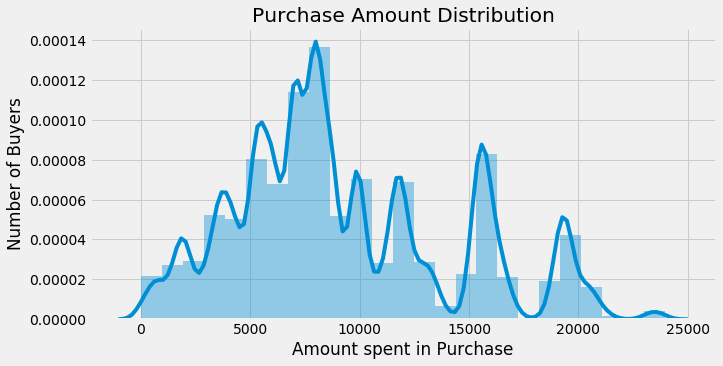

In [4]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
sns.distplot(train.Purchase,bins=25)
plt.xlabel("Amount spent in Purchase")
plt.ylabel("Number of Buyers")
plt.title("Purchase Amount Distribution")

In [5]:
numeric_features = train.select_dtypes(include = [np.number])
numeric_features.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

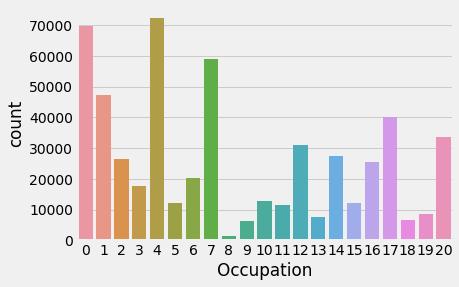

In [6]:
sns.countplot(train.Occupation)

#### Distribution of Martial Status

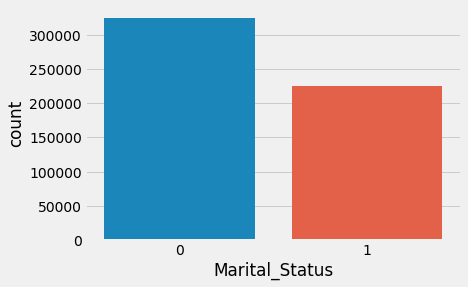

In [7]:
sns.countplot(train.Marital_Status)

#### Distribution of Product Category

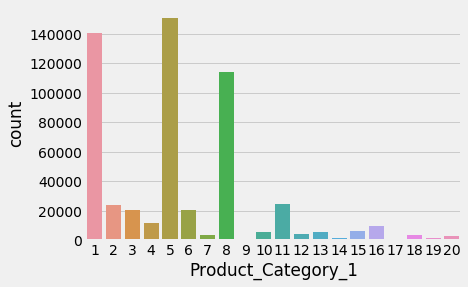

In [8]:
sns.countplot(train.Product_Category_1)

#### Corelation between Numerical preditors and Target Variable

In [9]:
corr = numeric_features.corr()
print(corr['Purchase'].sort_values(ascending=False)[:10],'\n')

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64 



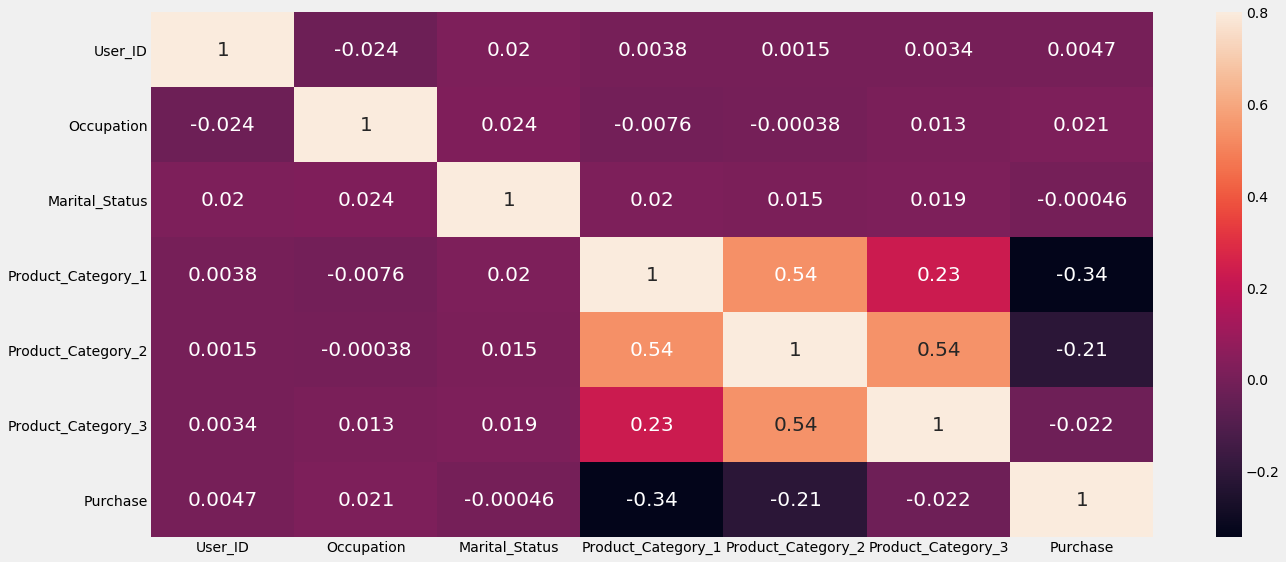

In [10]:
# correlation Matrix
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 20}, annot=True);

#### Categorical Predictors

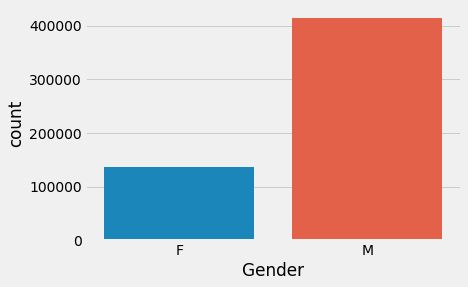

In [11]:
sns.countplot(train.Gender)

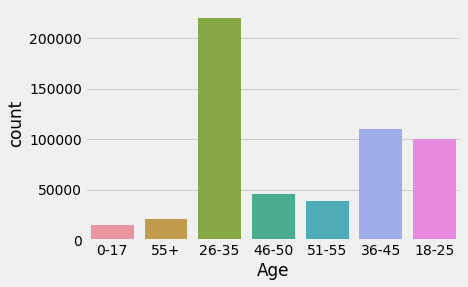

In [12]:
sns.countplot(train.Age)

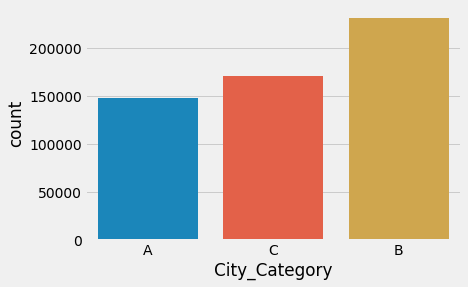

In [13]:
sns.countplot(train.City_Category)

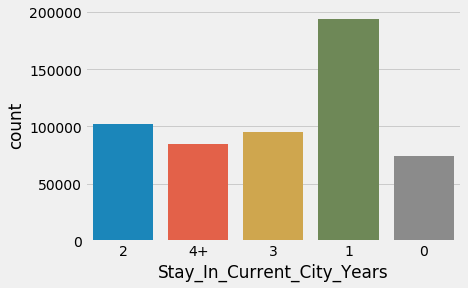

In [14]:
sns.countplot(train.Stay_In_Current_City_Years)

#### Bivariate Analysis

#### Occupation and Purchase Analysis

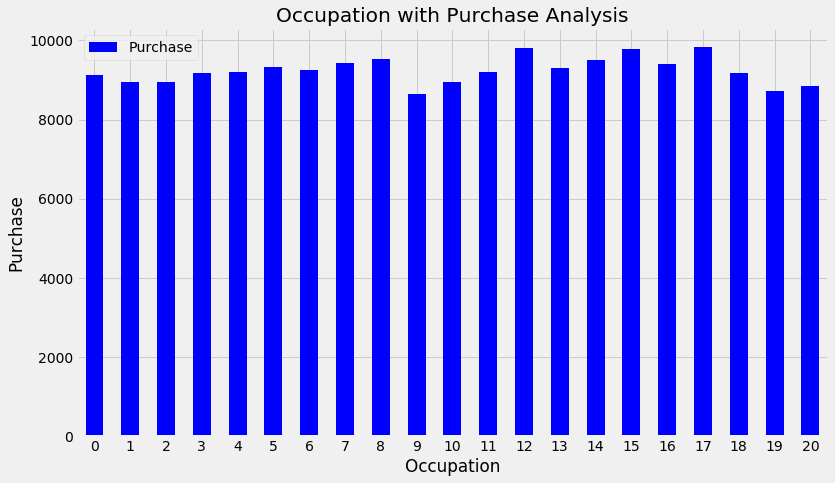

In [15]:
Occupation_pivot = train.pivot_table(index = 'Occupation',values="Purchase",aggfunc=np.mean)
Occupation_pivot.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation with Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

#### Marital Status and Purchase Analysis

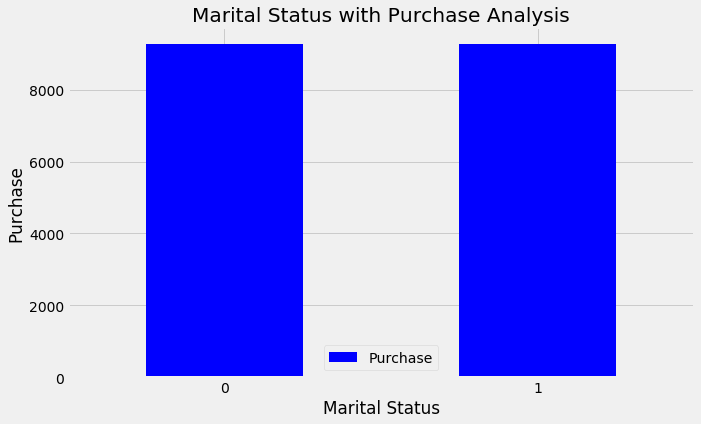

In [16]:
Marital_status_pivot = train.pivot_table(index="Marital_Status",values="Purchase",aggfunc=np.mean)
Marital_status_pivot.plot(kind="bar",color="blue",figsize=(10,6))
plt.xlabel("Marital Status")
plt.ylabel("Purchase")
plt.title("Marital Status with Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

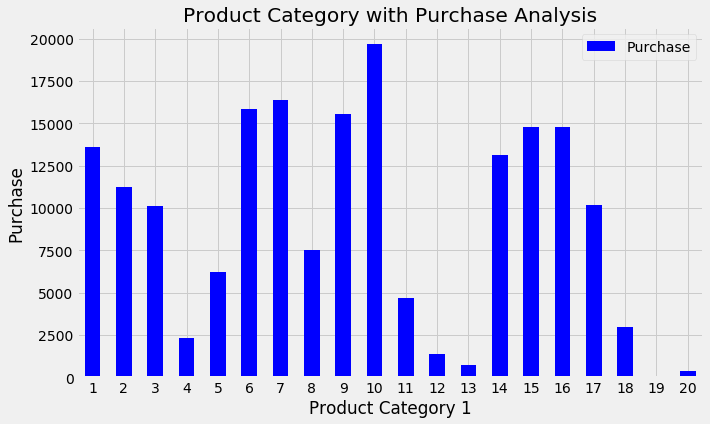

In [17]:
Marital_status_pivot = train.pivot_table(index="Product_Category_1",values="Purchase",aggfunc=np.mean)
Marital_status_pivot.plot(kind="bar",color="blue",figsize=(10,6))
plt.xlabel("Product Category 1")
plt.ylabel("Purchase")
plt.title("Product Category with Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

### Data Pre-Processing

In [18]:
# Join Train and Test Dataset
train['source']='train'
test['source']='test'
data = pd.concat([train,test], ignore_index = True, sort = False)
print(train.shape, test.shape, data.shape)

(550068, 13) (233599, 12) (783667, 13)


#### Looking for missing values

#### Check the percentage of null values

In [19]:
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.388587
Product_Category_3            69.648078
Purchase                      29.808452
source                         0.000000
dtype: float64

#### Imputing the value Zero

In [20]:
data["Product_Category_2"] = data["Product_Category_2"].fillna(-2.0).astype("float")
data.Product_Category_2.value_counts().sort_index()

-2.0     245982
 2.0      70498
 3.0       4123
 4.0      36705
 5.0      37165
 6.0      23575
 7.0        854
 8.0      91317
 9.0       8177
 10.0      4420
 11.0     20230
 12.0      7801
 13.0     15054
 14.0     78834
 15.0     54114
 16.0     61687
 17.0     19104
 18.0      4027
Name: Product_Category_2, dtype: int64

In [21]:
data["Product_Category_3"]= data["Product_Category_3"].fillna(-2.0).astype("float")
data.Product_Category_3.value_counts().sort_index()

-2.0     545809
 3.0        878
 4.0       2691
 5.0      23799
 6.0       6888
 8.0      17861
 9.0      16532
 10.0      2501
 11.0      2585
 12.0     13115
 13.0      7849
 14.0     26283
 15.0     39968
 16.0     46469
 17.0     23818
 18.0      6621
Name: Product_Category_3, dtype: int64

In [22]:
data.Product_Category_1.value_counts().sort_index()

1     200699
2      34056
3      28791
4      16756
5     215950
6      29326
7       5345
8     162294
9        604
10      7373
11     34440
12      5610
13      7930
14      2186
15      8984
16     13933
17       801
18      4436
19      1603
20      2550
Name: Product_Category_1, dtype: int64

In [23]:
# Get index of all columns with product category 1 equal 19 or 20 from train
condition = data.index[(data.Product_Category_1.isin([19,20])) & (data.source=="train")]
print(condition)
data = data.drop(condition)

Int64Index([545915, 545916, 545917, 545918, 545919, 545920, 545921, 545922,
            545923, 545924,
            ...
            550058, 550059, 550060, 550061, 550062, 550063, 550064, 550065,
            550066, 550067],
           dtype='int64', length=4153)


### Feature Engineering

#### Converting Gender to Binary

In [24]:
gender_dict = {'F':0,'M':1}
data["Gender"] = data["Gender"].apply(lambda x : gender_dict[x])
data["Gender"].value_counts()

1    587052
0    192462
Name: Gender, dtype: int64

#### Converting City_Category to binary

In [28]:
# Giving Age Numerical values
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
data["Age"] = data["Age"].apply(lambda line: age_dict[line])

data["Age"].value_counts()

2    311554
3    155898
1    141209
4     64902
5     54450
6     30316
0     21185
Name: Age, dtype: int64

In [29]:
city_category = {'A':0,'B':1,'C':2}
data["City_Category"] = data["City_Category"].apply(lambda x : city_category[x])
data["City_Category"].value_counts()

1    328524
2    241487
0    209503
Name: City_Category, dtype: int64

#### Converting Stay_In_Current_City_Years to binary

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data["Stay_In_Current_City_Years"] = le.fit_transform(data["Stay_In_Current_City_Years"])

data = pd.get_dummies(data, columns = ['Stay_In_Current_City_Years'])
data.dtypes

User_ID                           int64
Product_ID                       object
Gender                            int64
Age                               int64
Occupation                        int64
City_Category                     int64
Marital_Status                    int64
Product_Category_1                int64
Product_Category_2              float64
Product_Category_3              float64
Purchase                        float64
source                           object
Stay_In_Current_City_Years_0      uint8
Stay_In_Current_City_Years_1      uint8
Stay_In_Current_City_Years_2      uint8
Stay_In_Current_City_Years_3      uint8
Stay_In_Current_City_Years_4      uint8
dtype: object

#### Function to create count features

In [31]:
# feature representing the count of each user
def getCountVar(compute_df, count_df, var_name):
    grouped_df = count_df.groupby(var_name)
    count_dict = {}
    for name, group in grouped_df:
        count_dict[name] = group.shape[0]

    count_list = []
    for index, row in compute_df.iterrows():
        name = row[var_name]
        count_list.append(count_dict.get(name, 0))
    return count_list

In [32]:
data["Age_Count"]  =getCountVar(data, data, "Age")
data["Occupation_Count"]  =getCountVar(data, data, "Occupation")
data["Product_Category_1_Count"]  =getCountVar(data, data,"Product_Category_1")
data["Product_Category_2_Count"]  =getCountVar(data, data, "Product_Category_2")
data["Product_Category_3_Count"]  =getCountVar(data, data,"Product_Category_3")
data["Product_ID_Count"]  =getCountVar(data, data, "Product_ID")

In [ ]:
data.head(4)

In [33]:
train = data.loc[data['source'] == 'train']
test = data.loc[data['source'] == 'test']

test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

train.to_csv("data/train_modified.csv",index=False)
test.to_csv("data/test_modified.csv",index=False)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Model Building

In [34]:
train_df = pd.read_csv('data/train_modified.csv')
test_df = pd.read_csv('data/test_modified.csv')

In [39]:
#Define target and ID columns:
target = 'Purchase'
IDcol = ['User_ID','Product_ID']
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

<h4>Mean Squared Error</h4>


Model Report
RMSE : 4339
CV Score : Mean - 4339 | Std - 30.21 | Min - 4283 | Max - 4394


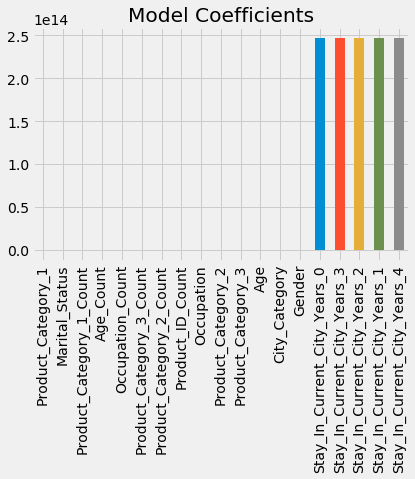

In [40]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)

predictors = train_df.columns.drop(['Purchase','Product_ID','User_ID'])
modelfit(LR, train_df, test_df, predictors, target, IDcol, 'LR.csv')

coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

#### Ridge Regression


Model Report
RMSE : 4346
CV Score : Mean - 4346 | Std - 29.91 | Min - 4288 | Max - 4398


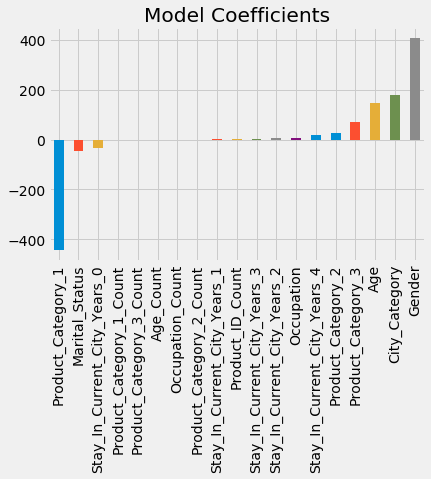

In [41]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05,normalize=True)
modelfit(RR, train_df, test_df, predictors, target, IDcol, 'RR.csv')

coef2 = pd.Series(RR.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

#### Decision Tree


Model Report
RMSE : 2680
CV Score : Mean - 2719 | Std - 18.98 | Min - 2684 | Max - 2749


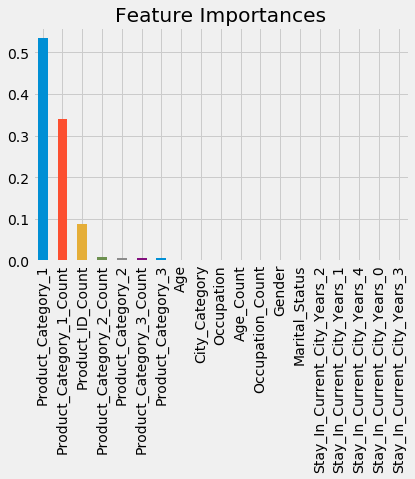

In [42]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train_df, test_df, predictors, target, IDcol, 'DT.csv')

coef3 = pd.Series(DT.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

#### Random Forest


Model Report
RMSE : 2803
CV Score : Mean - 2808 | Std - 20.18 | Min - 2773 | Max - 2845


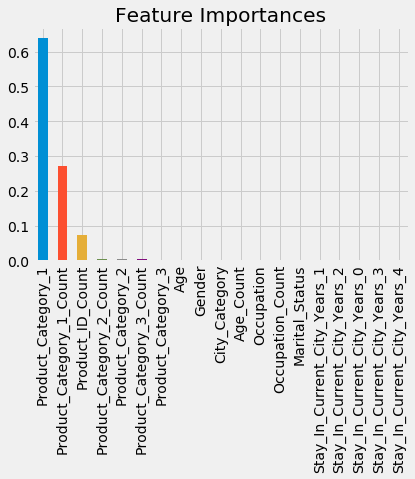

In [43]:
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, train_df, test_df, predictors, target, IDcol, 'RF.csv')

coef4 = pd.Series(RF.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

#### Ensemble Model

In [45]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_df[predictors], train_df[target], early_stopping_rounds=5, 
             eval_set=[(test_df[predictors], test_df[target])], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

In [46]:
#Predict training set:
train_df_predictions = my_model.predict(train_df[predictors])

# make predictions
predictions = my_model.predict(test_df[predictors])

In [49]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(mean_squared_error((train_df[target]).values, train_df_predictions)))

Mean Absolute Error : 392.2368668616966
RMSE : 2816


In [51]:
IDcol.append(target)
submission = pd.DataFrame({ x: test_df[x] for x in IDcol})
submission.to_csv("XGBoos.csv", index=False)